Counties deleted: {'02261'}
Counties added: {'02063', '02066'}
Max percentile change: 0.128
98% quantile change: 0.037


Text(0, 0.5, '# Counties')

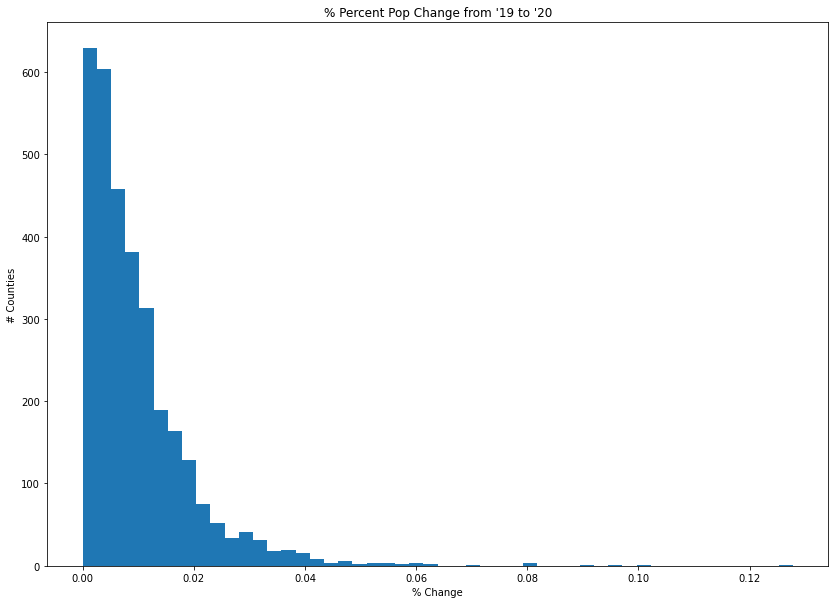

In [43]:
import pandas as pd

FIPS_POPULATION_URL = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv"
FIPS_POPULATION_2020_URL = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2020/counties/totals/co-est2020-alldata.csv"

df = pd.read_csv(FIPS_POPULATION_URL, encoding="ISO-8859-1")
df["fips"] = df.apply(lambda x: f"{x['STATE']:02d}{x['COUNTY']:03d}", axis=1)
df["pop"] = df["POPESTIMATE2019"]
df = df[["fips", "pop"]]
df2 = pd.read_csv(FIPS_POPULATION_2020_URL, encoding="ISO-8859-1")
df2["fips"] = df2.apply(lambda x: f"{x['STATE']:02d}{x['COUNTY']:03d}", axis=1)
df2["pop"] = df2["POPESTIMATE2020"]
df2 = df2[["fips", "pop"]]

print(f"Counties deleted: {set(df.fips) - set(df2.fips)}")
print(f"Counties added: {set(df2.fips) - set(df.fips)}")

df3 = pd.merge(df, df2, on="fips", how="inner", suffixes=("19", "20"))
pct_change = df3.pop19.sub(df3.pop20).abs().div(df3.pop19)
print(f"Max percentile change: {max(pct_change):.3f}")
print(f"98% quantile change: {pct_change.quantile(.98):.3f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
plt.hist(pct_change, bins=50)
plt.title("% Percent Pop Change from '19 to '20")
plt.xlabel("% Change")
plt.ylabel("# Counties")